# Deep Learning for the Geosciences (Technion 16837)

## Assignment #2a: K-Nearest Neighbors (KNN)

In [1]:
import numpy as np # Importing the numpy package to perform calculations
import matplotlib.pyplot as plt # Importing the pyplot package to plot data
import sys

%matplotlib inline

# Import local files
sys.path.append('code')
from utils import *
from knn import *

# Do not change below! Important for reloading code you write in external .py files.
%load_ext autoreload 
%autoreload 2 

---
## <ins>Note about chatGPT </ins>
As always, you may use chatGPT to complete your assignments, if you indicate you did. However, since our goal here is not only to get a good grade - but also to learn something - I recommend that you first attempt to solve the assignment yourself and only then look at what ChatGPT has to offer. 

When choosing to use ChatGPT:
1. Please write your input prompt.
2. Try to understand the code instead of just copying it.
3. Explain the code in words. What does each line do? What is the expected input and output?

Important note: Failing to disclose the use of ChatGPT or similar AI tools in an assignment may lead to the loss of all points for the assignment.

---

# 1. <ins>Download the dataset</ins>

## <ins>Instructions for Downloading CIFAR-10 Dataset Manually</ins>

Follow these steps to download and prepare the CIFAR-10 dataset:

1. Go to the CIFAR-10 dataset website: [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)
2. Download the CIFAR-10 dataset Python version.
3. Extract the downloaded file.
4. Move the extracted folder to your project folder.
5. Create a directory called "data" to store the data. Data should contain 5 training batches (called data_batch_x) and one test batch.

In [3]:
data_dir = './data/'

# CIFAR-10 class labels
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load the CIFAR-10 training and testing data
X_train, y_train = load_training_data(data_dir)
X_test, y_test = load_testing_data(data_dir)

# Validation: Print the shape of the loaded training data and labels
print(f"Shape of X_train: {X_train.shape}")  # Expected: (50000, 32, 32, 3)
print(f"Shape of y_train: {y_train.shape}")  # Expected: (50000,)

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


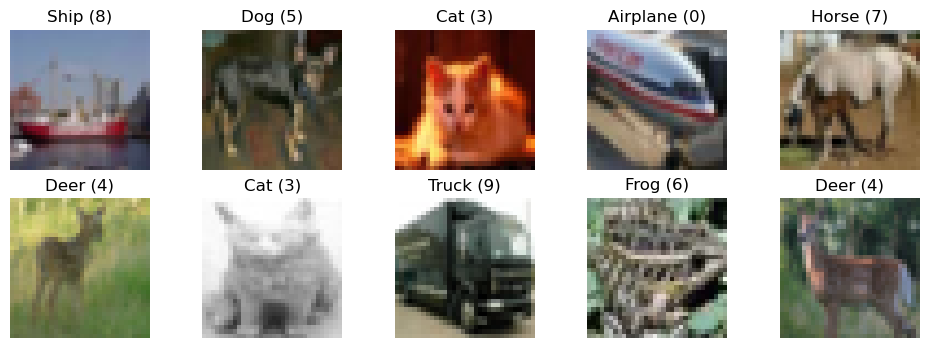

In [4]:
# Display 10 randomly selected images with label names
plt.figure(figsize=(12, 4))
indices = np.random.choice(len(X_train), 10, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f"{label_names[y_train[idx]]} ({y_train[idx]})")
    plt.axis('off')
plt.show()

In [5]:
# Flatten the images. Each image is 32x32x3, so after flattening, it will be 3072-dimensional.
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Print the new shapes of the flattened data
print(f"Flattened training data shape: {X_train_flat.shape}")  # Expected: (50000, 3072)
print(f"Flattened testing data shape: {X_test_flat.shape}")  # Expected: (50000, 3072)


Flattened training data shape: (50000, 3072)
Flattened testing data shape: (10000, 3072)


# 2. <ins>Train the model and predict class</ins>

### 2a. Write a function to compute the norm of a vector of order p
Complete the function knn_norm in the knn.py file

### 2b. Test your function

In [6]:
# Compute the norm of the following vectors
test_case_1 = np.array([1, 1, 1])
p1 = 1

test_case_2 = np.array([1, 1, 1])
p2 = 2

test_case_3 = np.array([1, 2, 3])
p3 = np.inf

test_precision = 1e-2

if (knn_norm(test_case_1, p1) - 3) < test_precision:
    print('Test 1 passed.')
else:
    print('Test 1 failed.')

if (knn_norm(test_case_2, p2) - 1.73) < test_precision:
    print('Test 2 passed.')
else:
    print('Test 2 failed.')

if (knn_norm(test_case_3, p3) - 3) < test_precision:
    print('Test 3 passed.')
else:
    print('Test 3 failed.')

Test 1 passed.
Test 2 passed.
Test 3 passed.


### 3c. Compute the euclidean distance between a single image from the test dataset and the training dataset
Calculate the L2 norm of the difference between one of the test images and the training images (the euclidean distance).

In [7]:
# Pick a test image from the test set
random_index = np.random.randint(0, len(X_test_flat))
test_img = X_test_flat[random_index]

# Compute the euclidean distances between this images and rest of images
distances = compute_distances(test_img, X_train_flat)

(50000,)

### 3d. Decide, based on the k closest images, to which class does your test image belong to
Complete the function predict_class in the knn.py file.

Truck


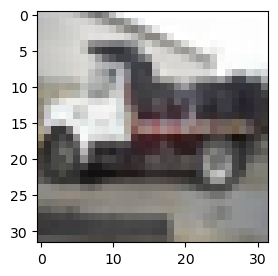

In [8]:
# Number of nearest neighbors
k = 10

### YOUR CODE GOES HERE
predicted_classes = predict_class(distances, k, y_train)
print(label_names[predicted_classes])

fig, ax = plt.subplots(figsize = (3,3))
plt.imshow(test_img.reshape(32, 32, 3))
plt.show()


### YOUR CODE ENDS HERE


### 3e. Now repeat this for 20 test images, and compute accuracy

In [16]:
import time

In [19]:
# Parameters
k = 10  # Number of nearest neighbors to consider
num_images = 20  # Number of random test images to classify

### YOUR CODE GOES HERE
indexes = np.random.choice(len(X_test_flat), num_images, replace = False)

predictions = list()
manual_labels = list()

start = time.time()
for index in indexes:
    test_img = X_test_flat[index]
    manual_label = y_test[index]
    manual_labels.append(manual_label)

    distances = compute_distances(test_img, X_train_flat)

    predicted_index = predict_class(distances, k, y_train)
    predictions.append(predicted_index)

### YOUR CODE ENDS HERE

# Calculate accuracy
accuracy = np.mean(np.array(predictions) == np.array(manual_labels)) * 100

end = time.time()
print(f"Accuracy for {num_images} randomly selected test images: {accuracy:.2f}%")
print(end - start)

Accuracy for 20 randomly selected test images: 35.00%
15.664990186691284


***
## <font color='lightgreen'>Answer the following questions</font>
1. What happens as we change k? Try computing the accuracy for values of k between 2-10.
2. What happens when we change the norm order?
3. Why is our code so slow? What could we do to make it more efficient?
***

In [25]:
# Q1
from tqdm import tqdm
# Parameters
num_images = 5  # Number of random test images to classify

# trainAccuracy = []
testAccuracy = []

indexes_Train = np.random.choice(len(X_train_flat), 50000, replace = False)
train_imgs = X_train_flat[indexes_Train,:].astype(np.float32)
p=2

for K in tqdm(range(2,10)):
    # print(K)
    ### YOUR CODE GOES HERE
    indexes_Test = np.random.choice(len(X_test_flat), num_images, replace = False)
    # indexes_Train = np.random.choice(len(X_train_flat), num_images, replace = False)

    test_img = X_test_flat[indexes_Test,:]
    manual_labels_test = y_test[indexes_Test]
    
    # print(tain_imgs.shape)
    
    distances = vectorized_compute_distances(test_img, train_imgs,p,num_images)

    predicted_test = predict_class_vec(distances, k, y_train)

    accuracy = np.mean(np.array(predicted_test) == np.array(manual_labels_test)) * 100
    testAccuracy.append(accuracy)





100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [17:58<00:00, 134.86s/it]


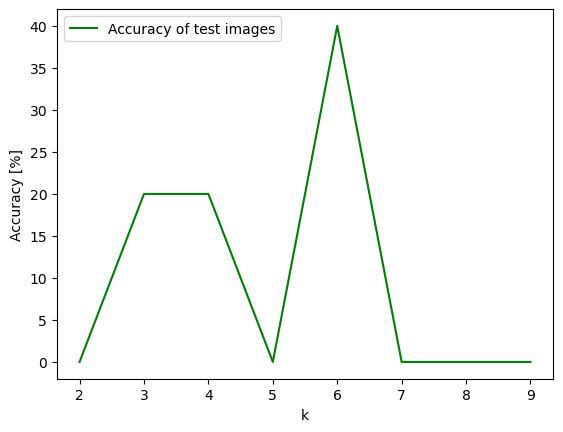

In [26]:
plt.plot(range(2,10),testAccuracy, c = "g", label = "Accuracy of test images")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy [%]")
plt.show()
# print(f"Accuracy for {num_images} randomly selected test images: {accuracy:.2f}%")

In [29]:
num_images = 20  # Number of random test images to classify

# trainAccuracy = []
testAccuracy = []

indexes_Train = np.random.choice(len(X_train_flat), 10000, replace = False)
train_imgs = X_train_flat[indexes_Train,:].astype(np.float16)
k=6

for p in tqdm(range(1,9)):
    # print(K)
    ### YOUR CODE GOES HERE
    indexes_Test = np.random.choice(len(X_test_flat), num_images, replace = False)
    # indexes_Train = np.random.choice(len(X_train_flat), num_images, replace = False)

    test_img = X_test_flat[indexes_Test,:].astype(np.float16)
    manual_labels_test = y_test[indexes_Test].astype(np.float16)
    
    # print(tain_imgs.shape)
    
    distances = vectorized_compute_distances(test_img, train_imgs,p,num_images)

    predicted_test = predict_class_vec(distances, k, y_train)

    accuracy = np.mean(np.array(predicted_test) == np.array(manual_labels_test)) * 100
    testAccuracy.append(accuracy)


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [10:14<00:00, 76.87s/it]


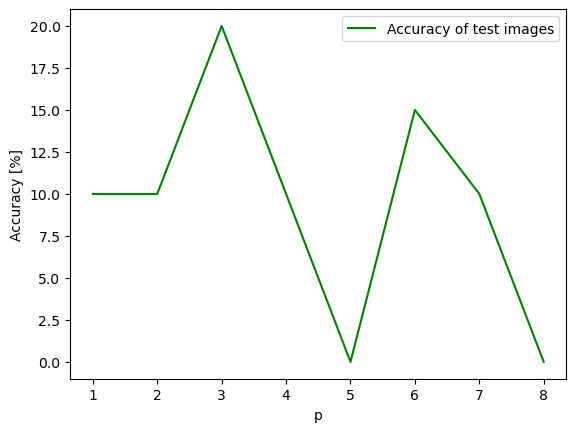

In [30]:
plt.plot(range(1,9),testAccuracy, c = "g", label = "Accuracy of test images")
plt.legend()
plt.xlabel("p")
plt.ylabel("Accuracy [%]")
plt.show()
# print(f"Accuracy for {num_images} randomly selected test images: {accuracy:.2f}%")